## 목표
- 버섯의 특징을 활용해서 식용/독성 버섯 분류
- 의사결정나무 그래프 시각화&과대적합 제어하기
- 특성의 중요도 확인
    - 중요한 특성일수록 탑노트에 위치
    - 모델 내부에 들어있는 기능

#### Decison Tree
- 스무고개 하듯이 예/아니오 질문을 반복하여 학습
- 특정기준(질문)에 따라 데이터를 구분하는 모델
- 분류와 회귀 모두 사용 가능

In [49]:
# 도구 불러오기
import pandas as pd
import matplotlib.pyplot as plt

# 데이터를 분리해주는 도구
from sklearn.model_selection import train_test_split

# 의사결정트리 분류 모델
from sklearn.tree import DecisionTreeClassifier

In [50]:
# 데이터 읽어오기
data = pd.read_csv("./data/mushroom.csv")
data

# 현재 데이터 값들이 문자열 형태 -> 디시전 트리는 범위로 질문하기때문에 문자열은 답할 수 없음
# 알파벳을 수치화 해줘야함! 

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [51]:
#데이터의 크기 확인하기
print('데이터 크기',data.shape) #(8124,23) - 22개의 특징 + 1개의 답데이터
print('정보 확인', data.info())
# 결측치가 없다-> 전처리 필요x
# 데이터 타입 문자열 -> 수치형으로 인코딩 필요

데이터 크기 (8124, 23)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   poisonous                 8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-

### 문제 데이터와 답 데이터 분리
- 문제(X, feature, 특성, 특징, 독립변수) : poisonous 컬럼을 제외한 모든 컬럼
- 답(y,label,라벨,레이블, 종속변수, 타겟) : poisonous 컬럼

In [52]:
# data.iloc[행,열] - 항상 행을 먼저 생각하자! 
X = data.iloc[:,1:]
y = data['poisonous']

In [53]:
# X데이터를 drop을 이용해서 넣는 방법도 있다
X = data.drop('poisonous',axis=1)

In [54]:
# 중요!! 데이터의 크기 확인하기
print('X',X.shape)
print('y',y.shape)

X (8124, 22)
y (8124,)


In [55]:
# X의 기술 통계량 확인
data.describe()
# 문자열만 있게되면 데이터의 특징을 추출해서 보여준다
# count : 데이터의 개수
# unique : 고유값(특정 알파벳의 개수)
# top : 고유값 중 제일 많이 등장한 알파벳
# freq : top 항목 count

,poisonous,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [56]:
# Label값의 횟수 확인
y.value_counts()

# e : 식용, p : 독성

e    4208
p    3916
Name: poisonous, dtype: int64

### 데이터 전처리
- 데이터 문자열 -> 수치화(인코딩)
- 인코딩 방법 2가지
    - 1. 원핫 인코딩(onehot encoding)
    - 2. 레이블 인코딩(label endoding)

In [57]:
# 원핫 인코딩 : 값이 크고 작음이 의미가 없을 때 사용(ex. 성별)
# 원핫 인코딩 도구 : pandas에서 제공 -> pd.get_dummies(컬럼이름)
X_one_hot = pd.get_dummies(X)
# 기술통계량에서 봤던 unique 개수 (알파벳의 종류)만큼 열이 늘어난다
# 그 알파벳에 해당하는 값이면 1, 나머지는 0 값을 배치

In [58]:
# 레이블 인코딩(추가설명) -> 값이 크고 작음에 의미가 있을 때 사용
# 우선순위나 랭킹같은 데이터를 인코딩 해줄 때 사용(ex. 사원, 대리..)
X['habitat'].unique()

# 딕셔너리를 활용해서 우선순위를 주자 
hb_dict = {'u':0,'g':1,'m':2,'d':3,'p':4,'w':5,'l':6}
# 특정대상에게 딕셔너리 넣어준 숫자를 맵핑
# map : 값을 맵핑(같은 키값을 가진 데이터에 밸류를 매칭, 변경)
X['habitat'].map(hb_dict)

# 각 알파벳이 숫자로 바뀐다

0       0
1       1
2       2
3       0
4       1
       ..
8119    6
8120    6
8121    6
8122    6
8123    6
Name: habitat, Length: 8124, dtype: int64

### train, test 분리

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X_one_hot,y,test_size=0.3,random_state=7)

# 데이터 크기 확인해주기!! 
print('훈련용 문제',X_train.shape)
print('테스트용 문제',X_test.shape)
print('훈련용 답',y_train.shape)
print('테스트용 답',y_test.shape)

훈련용 문제 (5686, 117)
테스트용 문제 (2438, 117)
훈련용 답 (5686,)
테스트용 답 (2438,)


### 모델링

In [60]:
# 모델 객체 생성(아기를 생성)
tree_model = DecisionTreeClassifier()
# 모델 학습(아기를 학습)
tree_model.fit(X_train,y_train)
# 모델 정확도 평가
tree_model.score(X_test,y_test)

1.0

### 하이퍼 파라미터를 조정하여 과대적합 제어하기

In [61]:
# 모델 객체 생성
tree_model2 = DecisionTreeClassifier(max_depth=3)
# 모델 학습
tree_model2.fit(X_train,y_train)
# 모델 정확도 평가
tree_model2.score(X_test,y_test)

# 보유한 데이터는 한정적 -> 데이터가 많은수록 과적합제어가 쉬워진다
# 한정적인 데이터내에서는 여러번의 검증을 진행할 수는 없을까? 교차검증!

0.9868744872846595

### 교차검증 - 모델의 일반화를 확인하는 과정
- 이 모델의 일반화 성능이 어느정도일까?
- 개념) 일반 성능 측정 방법 - 모델 데이터에 대해 모델이 얼마나 잘 맞히는지 평가, 한번에 하는 것보다 신뢰도가 높아진다
- 방법) (훈련데이터내에서) 훈련세트와 테스트 세트로 여러번 나누어서 평가
- 모델을 정의하고 학습전에 정확도가 얼마인지 확인 가능

In [62]:
# 교차 검증 사이킷런! 
from sklearn.model_selection import cross_val_score
# (적용할 모델명, 훈련문제, 훈련답, cv=교차검증할 횟수)
result = cross_val_score(tree_model,X_train,y_train,cv=5)
result
# 우리가 만든 tree_model 1호는 어떤 데이터가 들어와도 좋은 성능을 낸다
# 과적합 확률은 적음을 알 수 있다. 

# 교차검증의 정확도 평균
result.mean()

0.9998240985048372

### tree 모델 내부 시각화
- 외부라이브러리인 graphviz(트리내부를 시각화 하기위한 라이브러리)

In [63]:
! pip install graphviz

In [64]:
# tree모델 시각화(과적합 제어 안한 1호 모델)
from sklearn.tree import export_graphviz

# (학습한 모델명, out_file = 우리가 만들 파일이름.dot)
# dot 파일은 그래프를 불러오기 위한 텍스트 형식의 파일
export_graphviz(tree_model,out_file='data/tree.dot',
               class_names=['독','식용'],#정답 데이터의 이름,
               feature_names=X_one_hot.columns,
               impurity=True,
               filled=True)
# 학습 되어있는 트리의 내부 모습을 보기 위함
# 학습된 모델의 정보가 들어있는 dot파일을 생성한 것 

In [65]:
import os
os.environ['PATH']+=os.pathsep+'C:\\Program Files\\Graphviz\\bin\\'

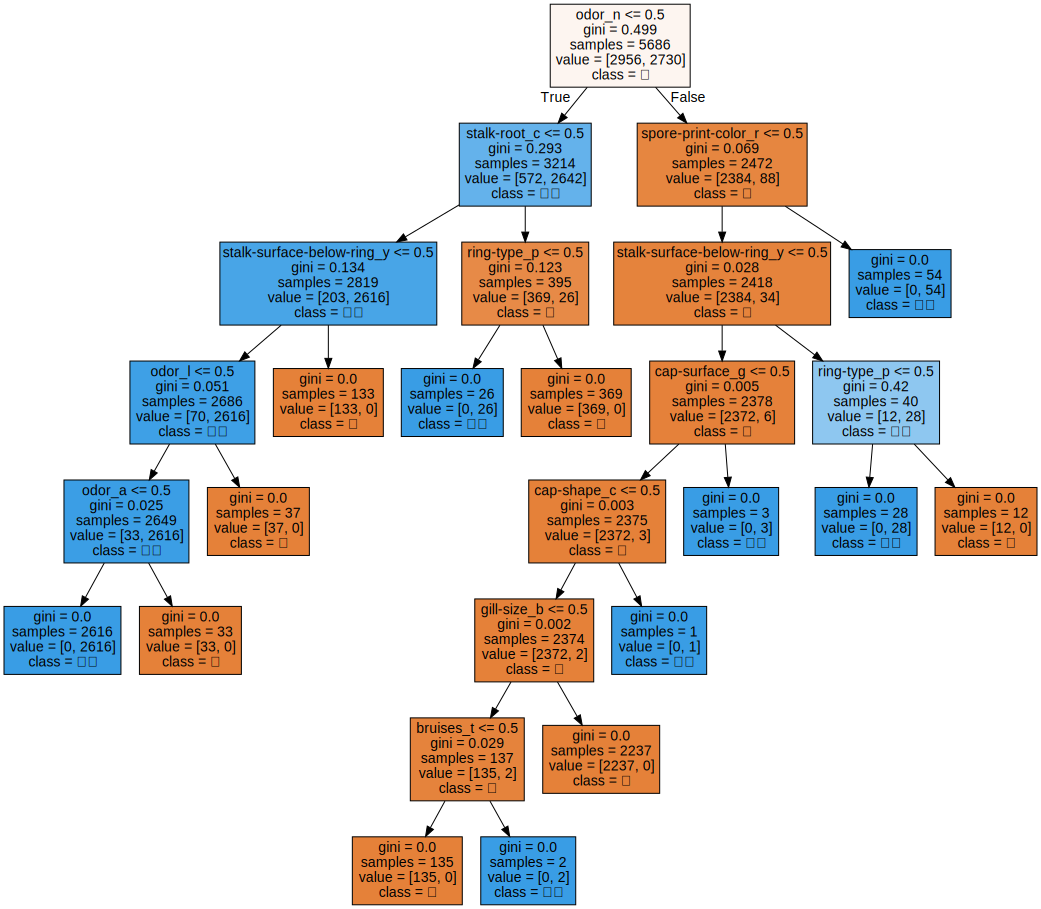

In [68]:
# dot파일ㅇ을 가져와서 실제로 그래프로 표현
import graphviz

# tree.dot 파일을 불러오면서 한글로 인코딩해주는 코드
with open('data/tree.dot',encoding='UTF-8') as f:
    dot_graph = f.read()# 그래프를 출력시켜주는 코드
    
display(graphviz.Source(dot_graph))
    
# 그래프 해석
# 기준 <= 0.5 : 원핫 인코딩 이후에 0 또는 1을 구분해주는 조건값
# gini : 지니 불순도, 0에 가까울수록 불순도가 낮아짐
# samples : 데이터의 개수
# value : 클래스별 개수(독, 식용)
# class : 예측한 정답값 (분류했을때 투표형식으로 더 많은 정답값을 가진 Lable 을 말해준다 )

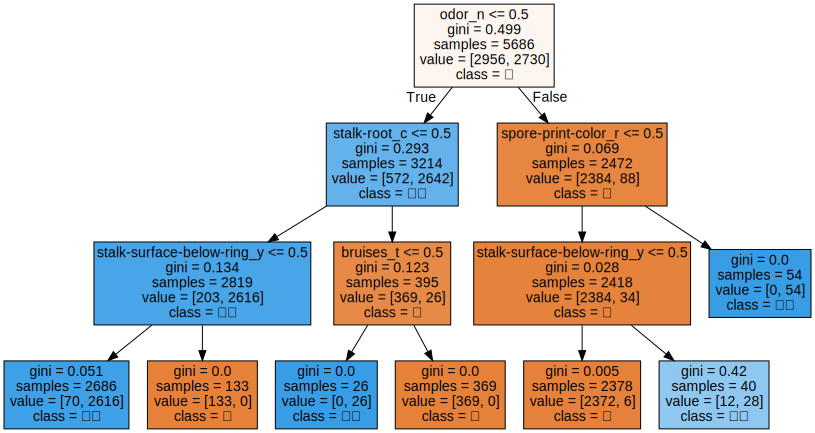

In [72]:
# 과대적합을 제어한 tree_model2 시각화 해보기
export_graphviz(tree_model2,out_file='data/tree2.dot',# 경로/파일이름.확장자
                    class_names=['독','식용'],
                    max_depth=3,
                    feature_names=X_one_hot.columns,
                    impurity = True,
                    filled=True)

import graphviz

# dot파일 불러오면서 한글 인코딩
with open('data/tree2.dot',encoding='UTF-8') as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

### 모델 복잡도 곡선 그려보기

In [77]:
# 정확도 담을 수 있는 빈 리스트 생성
train_list = []
test_list = []

for i in range(1,11):
    # 모델 객체 생성
    tree_model3 = DecisionTreeClassifier(max_depth=i)
    # 모델 학습
    tree_model3.fit(X_train,y_train)
    # 모델 정확도 평가
    test_list.append(tree_model3.score(X_test,y_test))
    train_list.append(tree_model3.score(X_train,y_train))
    

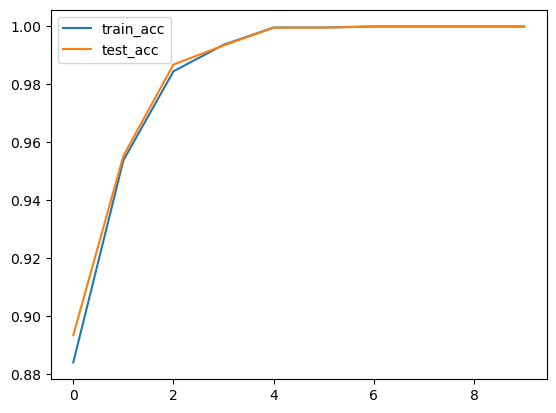

In [79]:
# 그래프 시각화
plt.plot(train_list, label = 'train_acc')
plt.plot(test_list, label = 'test_acc')

plt.legend()

plt.show()
# 5이상으로 커지는 것은 의미 없다
# 더이상 정확도가 올라가지 않을 정도만 깊이를 조정해주자! 

### 특성 선택
- 지도 학습 모델에서 데이터의 각 특성들의 중요도를 확인할 수 있다
- 정답에 얼만큼 영향을 미치는 특성인가 수치로 확인 가능
- 각 특성들은 0-1의 중요도를 가진다
- 총 특성의 합은 1이다
- tree 모델의 특성 중요도가 높은 값부터 탑 노트에 배치해 분류

In [81]:
# tree 모델 특성 중요도 확인해보기
fi = tree_model.feature_importances_

In [87]:
# 특성중요도 DataFrame화 해주기
fi_df = pd.DataFrame(fi,index=X_one_hot.columns,columns=['특성중요도'])
fi_df.sort_values(by = '특성중요도',ascending=False)

# 상위 5개의 특징 정도만 영향을 미치는 걸 확인할 수 있다

,특성중요도
odor_n,0.608902
stalk-root_c,0.181454
stalk-surface-below-ring_y,0.098180
spore-print-color_r,0.036178
odor_l,0.025074
...,...
gill-color_g,0.000000
gill-color_e,0.000000
gill-color_b,0.000000
gill-size_n,0.000000


## 정리
- tree 모델 내부 시각화 표를 보면 가장 중요도가 높은 특성이 odor_n컬럼을 가장 먼저 고려해서 분류를 진행한 것을 알 수 있었다.
- 중요도가 가장 높은 컬럼을 먼저 고려해야 효율적으로 분류가 가능하다
- 현재 mushroom 데이터는 odor_n컬럼이 약 60% 이상의 중요도를 혼자 차지하고 있었기 때무넹 모델 학습에 용이 -> 100프로 정확도가 쉽게 출력됐음